9


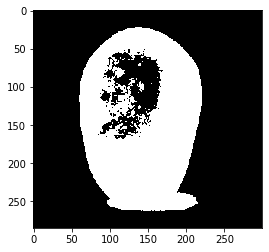

In [135]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('kartoffel.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

otsu = cv.THRESH_BINARY_INV+cv.THRESH_OTSU
print(otsu)
ret, thresh = cv.threshold(gray,0,255,9)
plt.imshow(thresh, cmap = plt.get_cmap('gray'))
plt.show()

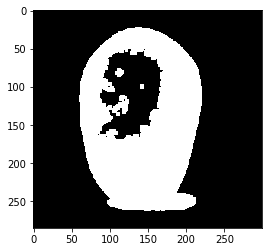

In [130]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
plt.imshow(opening, cmap = plt.get_cmap('gray'))
plt.show()

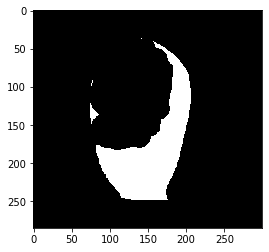

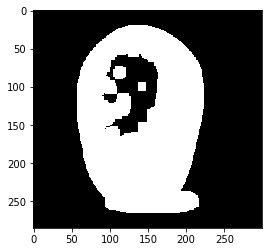

In [131]:
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.3*dist_transform.max(),255,0)
plt.imshow(sure_fg, cmap = plt.get_cmap('gray'))
plt.show()
plt.imshow(sure_bg, cmap = plt.get_cmap('gray'))
plt.show()

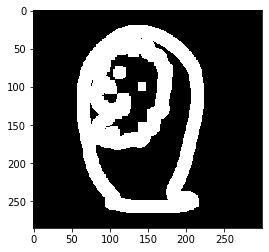

In [132]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
plt.imshow(unknown, cmap = plt.get_cmap('gray'))
plt.show()

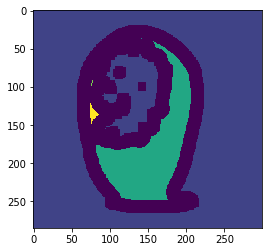

In [133]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
plt.imshow(markers)
plt.show()

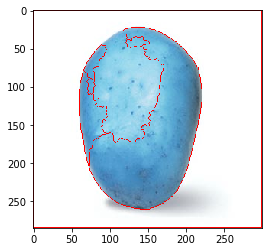

In [134]:
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.imshow(img)
plt.show()